### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sumit Sah\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Sumit Sah\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\User

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sumit Sah\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Sumit Sah\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\User

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [111]:
# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv("pet_adoption_data.csv")


# Step 2: Display the number of rows and columns in the dataset
print("Dataset dimensions:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n")

# Step 3: Display the first few rows of the dataset to get an overview
print("First 5 rows of the dataset:")
display(df.head())

Dataset dimensions:
Number of rows: 2007
Number of columns: 13


First 5 rows of the dataset:


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [112]:
# Step 4: Drop the columns that do not add much value to the analysis
df = df.drop('pet_id', axis=1)


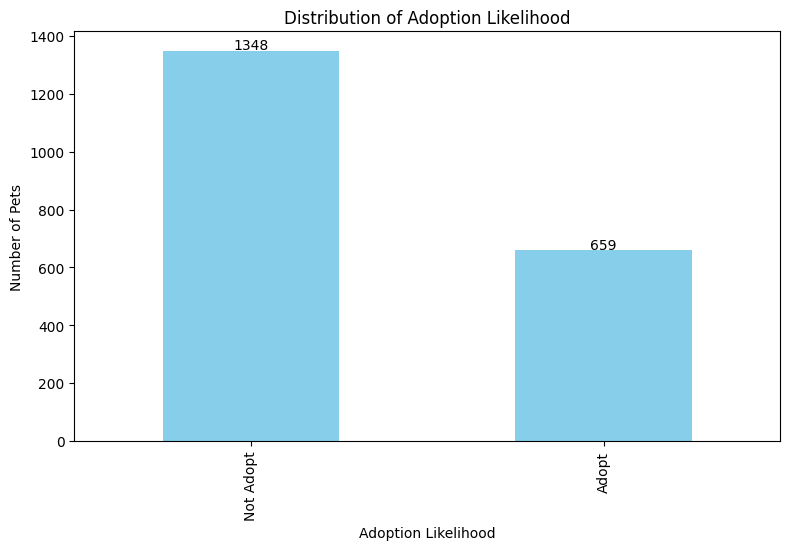

Number of pets in each adoption likelihood category:
adoption_likelihood
0    1348
1     659
Name: count, dtype: int64


In [113]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
# Count how many pets fall into each adoption likelihood category
adoption_counts = df['adoption_likelihood'].value_counts().sort_index()

# Create a simple bar chart
plt.figure(figsize=(8, 5))
adoption_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Number of Pets')

# Add count labels on top of each bar
for i, count in enumerate(adoption_counts):
    plt.text(i, count + 5, str(count), ha='center')

# Show the plot
plt.tight_layout()
plt.xticks([0, 1], ["Not Adopt", "Adopt"])
plt.show()

# Print the counts for each category
print("Number of pets in each adoption likelihood category:")
print(adoption_counts)


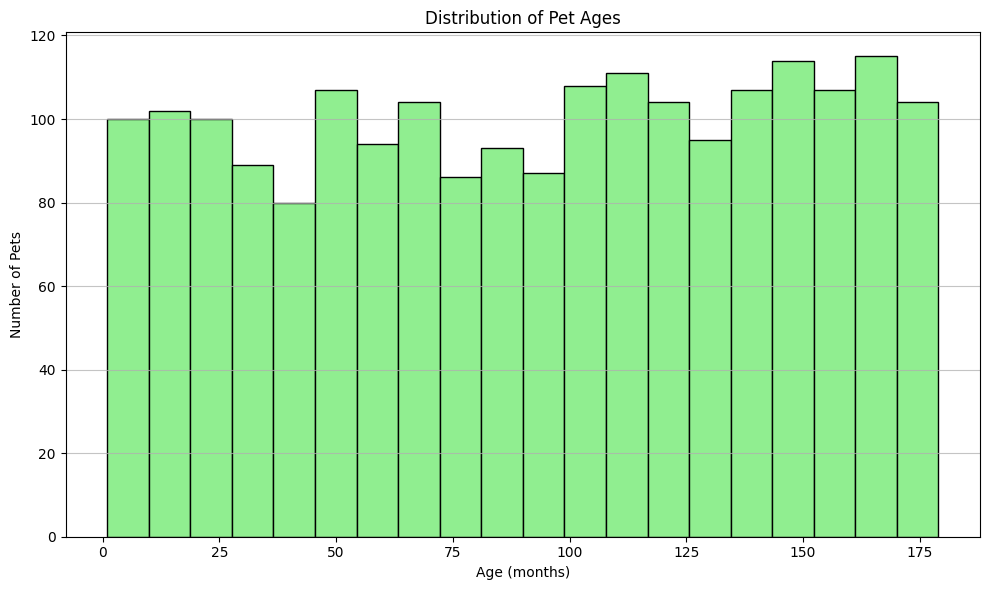

Youngest pet: 1 months
Oldest pet: 179 months
Average age: 92.3 months
Median age: 94.0 months


In [114]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age_months'], bins=20, color='lightgreen', edgecolor='black')

# Add title and labels
plt.title('Distribution of Pet Ages')
plt.xlabel('Age (months)')
plt.ylabel('Number of Pets')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics about the age distribution
print(f"Youngest pet: {df['age_months'].min()} months")
print(f"Oldest pet: {df['age_months'].max()} months")
print(f"Average age: {df['age_months'].mean():.1f} months")
print(f"Median age: {df['age_months'].median()} months")

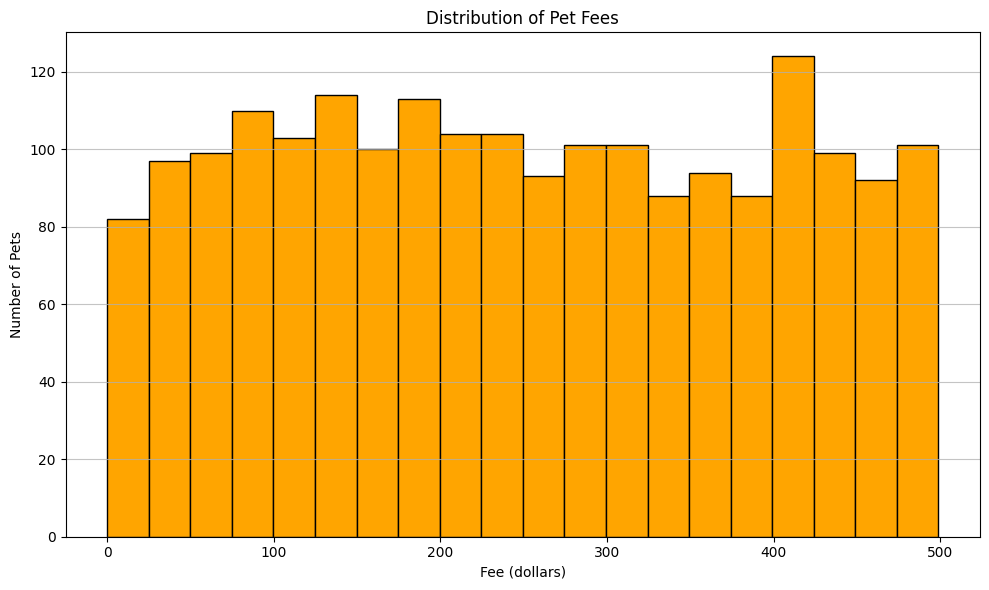

Cheapest pet: 0 dollars
Most expensive pet: 499 dollars
Average price: 249.1 dollars
Median price: 242.0 dollars


In [115]:
# Step 7: Visualize the distribution of 'adoption_fee' using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['adoption_fee'], bins=20, color='orange', edgecolor='black')

# Add title and labels
plt.title('Distribution of Pet Fees')
plt.xlabel('Fee (dollars)')
plt.ylabel('Number of Pets')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics about the age distribution
print(f"Cheapest pet: {df['adoption_fee'].min()} dollars")
print(f"Most expensive pet: {df['adoption_fee'].max()} dollars")
print(f"Average price: {df['adoption_fee'].mean():.1f} dollars")
print(f"Median price: {df['adoption_fee'].median()} dollars")

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'color'`, `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
    - `'adoption_fee'`: Standard scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [116]:
# Step 1: Encode the categorical variables

# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
df['size_number'] = df['size'].map({
    'Small': 1,
    'Medium': 2,
    'Large': 3
})
# df.head()
df.drop('size', axis = 'columns', inplace = True)
# Encode 'color', 'pet_type' and 'breed' using one-hot encoding
df = pd.get_dummies(df, columns=['color', 'pet_type','breed'])
df.head()

,age_months,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,size_number,color_Black,...,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Golden Retriever,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,5.039768,1,0,27,140,0,0,3,False,...,False,False,False,False,False,True,False,False,False,False
1,73,16.086727,0,0,8,235,0,0,3,False,...,False,False,True,False,False,False,False,False,True,False
2,136,2.076286,0,0,85,385,0,0,2,False,...,False,True,False,True,False,False,False,False,False,False
3,97,3.339423,0,0,61,217,1,0,1,False,...,False,False,False,False,False,True,False,False,False,False
4,123,20.498100,0,0,28,14,1,0,3,False,...,False,False,True,False,False,False,False,False,True,False


In [117]:
# Step 2: Scale the numerical features

# Scale 'weight_kg' using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
weight_scaler = MinMaxScaler()
df['weight_kg'] = weight_scaler.fit_transform(df[['weight_kg']])

# Scale 'adoption_fee' using StandardScaler
from sklearn.preprocessing import StandardScaler
fee_scaler = StandardScaler()
df['adoption_fee'] = fee_scaler.fit_transform(df[['adoption_fee']])

In [118]:
# step3: Display the first few rows of the updated dataset.
df.head()


,age_months,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,size_number,color_Black,...,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Golden Retriever,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,0.138783,1,0,27,-0.764025,0,0,3,False,...,False,False,False,False,False,True,False,False,False,False
1,73,0.520009,0,0,8,-0.098998,0,0,3,False,...,False,False,True,False,False,False,False,False,True,False
2,136,0.036514,0,0,85,0.951044,0,0,2,False,...,False,True,False,True,False,False,False,False,False,False
3,97,0.080105,0,0,61,-0.225003,1,0,1,False,...,False,False,False,False,False,True,False,False,False,False
4,123,0.672244,0,0,28,-1.646060,1,0,3,False,...,False,False,True,False,False,False,False,False,True,False


### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [119]:
# Step 1: Select the features and the target variable for modeling
X = df.drop('adoption_likelihood', axis = 'columns')
y = df['adoption_likelihood']
# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Print the model's accuracy score on the test data
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

Decision Tree Classifier Accuracy: 0.8607


In [121]:
# Step 5: Make predictions on the test set


# Step 6: Evaluate the model using a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       403
           1       0.76      0.84      0.80       200

    accuracy                           0.86       603
   macro avg       0.84      0.86      0.85       603
weighted avg       0.87      0.86      0.86       603


Confusion Matrix:
[[350  53]
 [ 31 169]]


Text(0.5, 1.0, 'Confusion Matrix')

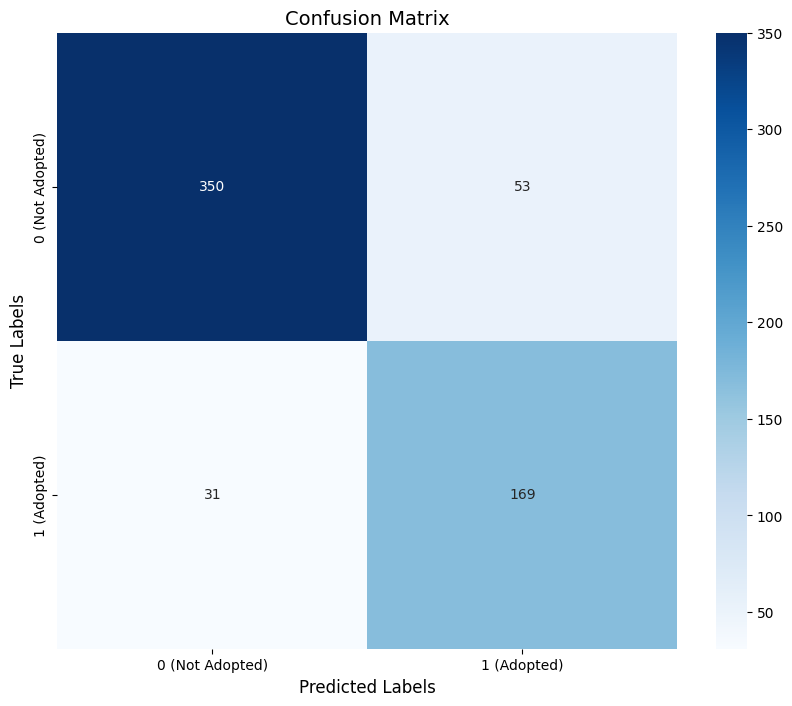

In [122]:
# Step 7: Visualize the confusion matrix
import seaborn as sns
# Create a figure with a larger size
plt.figure(figsize=(10, 8))
class_labels = ['0 (Not Adopted)', '1 (Adopted)']  # You can customize these labels
# Create a heatmap with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels= class_labels, 
            yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)



### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [125]:
# Step 1: Train the Decision Tree model with specified hyperparameters
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42  # For reproducibility
)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
# Step 2: Print the model's accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

# Step 3: Make predictions on the test set


# Step 4: Evaluate the model using a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Decision Tree Classifier Accuracy: 0.9055

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603


Confusion Matrix:
[[384  19]
 [ 38 162]]


Text(0.5, 1.0, 'Confusion Matrix')

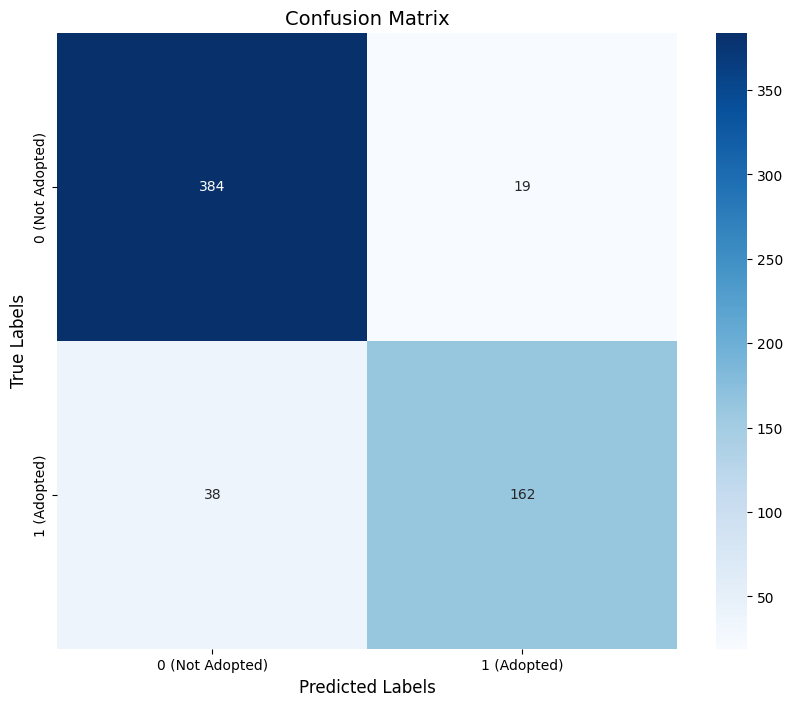

In [126]:
# Step 5: Visualize the confusion matrix
import seaborn as sns
# Create a figure with a larger size
plt.figure(figsize=(10, 8))
class_labels = ['0 (Not Adopted)', '1 (Adopted)']  # You can customize these labels
# Create a heatmap with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels= class_labels, 
            yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

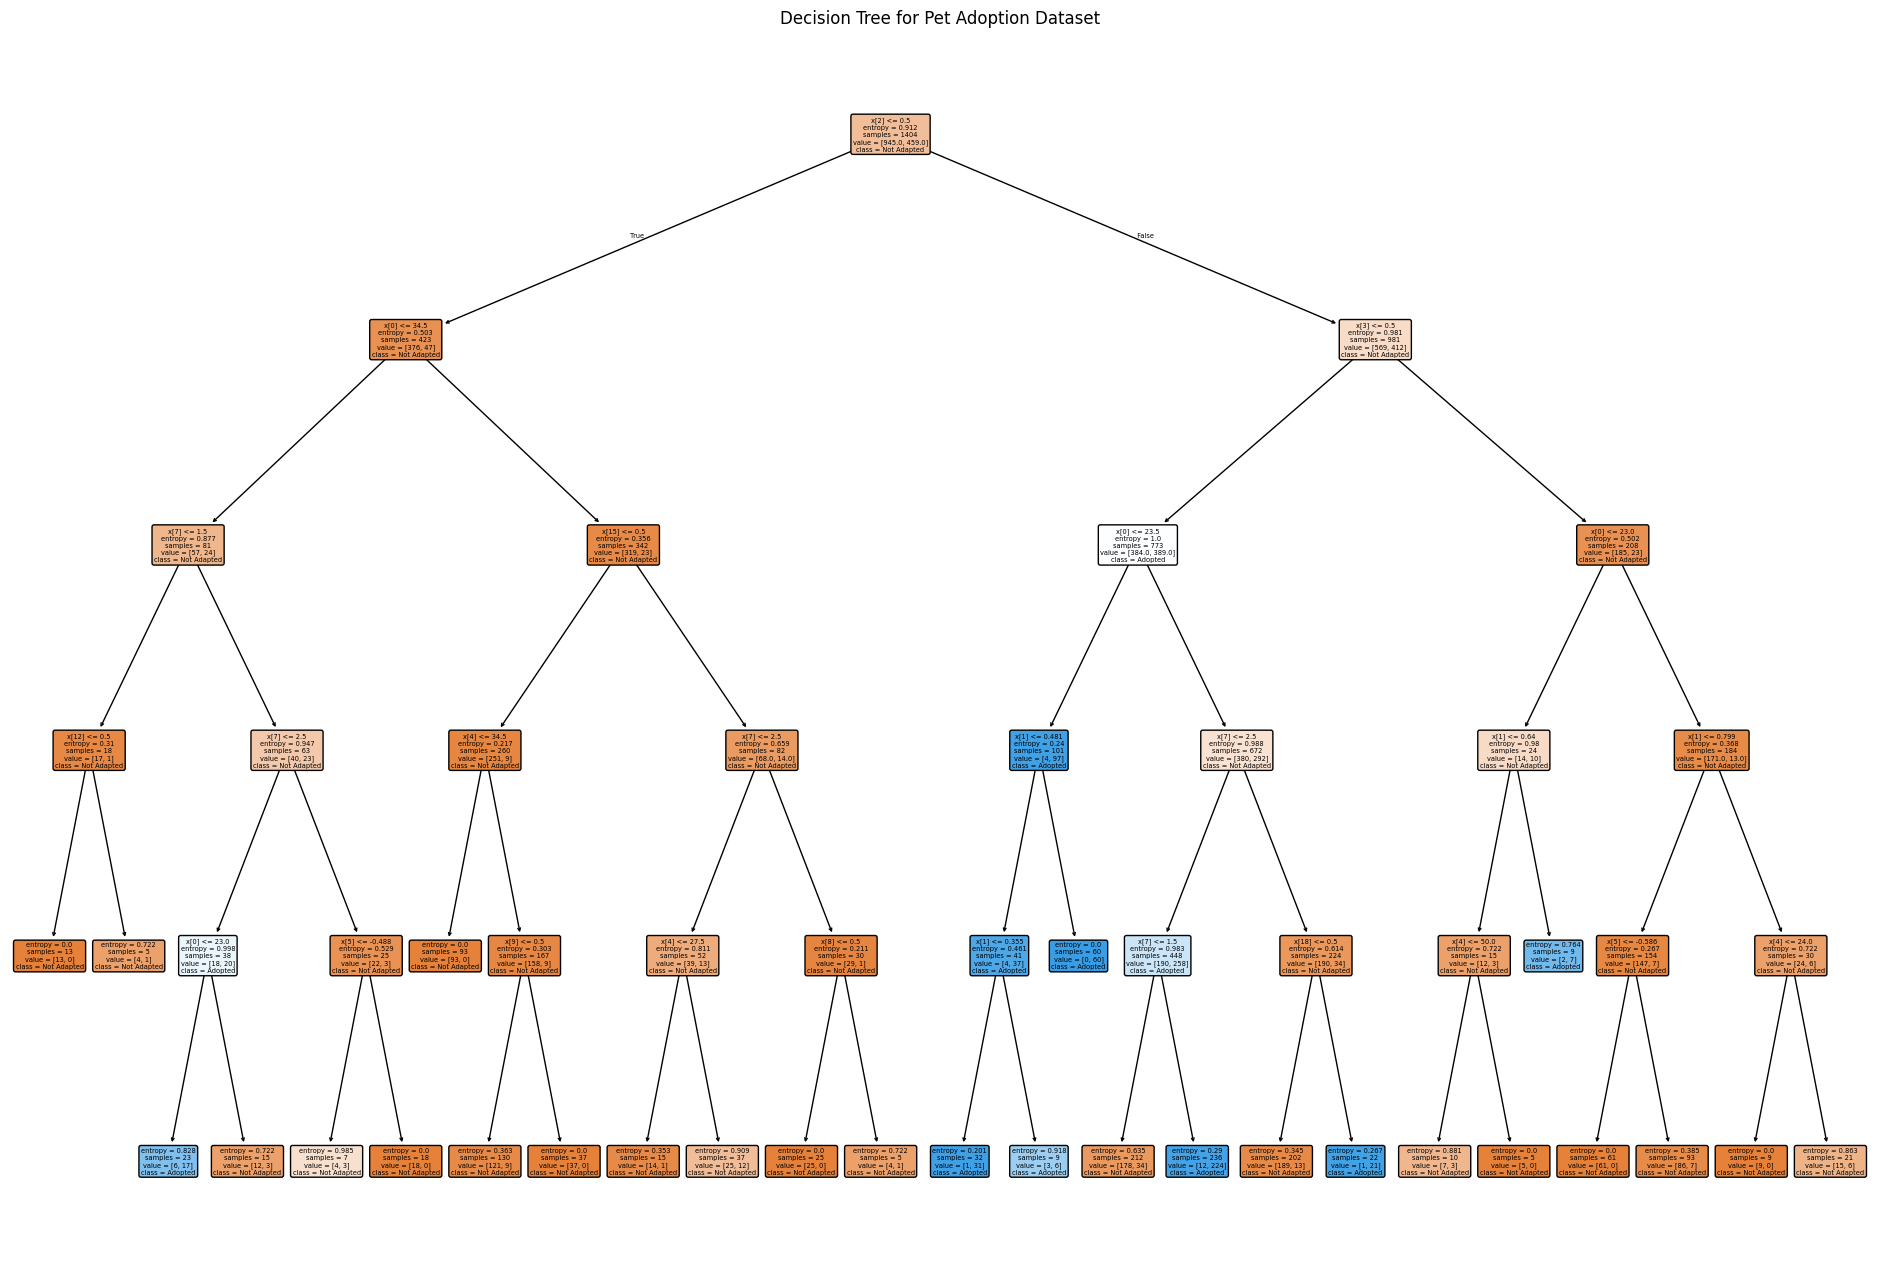

In [129]:
# Step 6: Visualize the decision tree
plt.figure(figsize=(24, 16))
plot_tree(dt_classifier, 
          class_names=['Not Adapted','Adopted'], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree for Pet Adoption Dataset")
plt.show()